In [33]:
import pandas as pd
dataframe = pd.DataFrame()
row_data = {}

count = 1
with open('poea_dataset.txt') as in_file:
    for line in in_file:
        if line != '\n':
            if count == 1:
                row_data['Name'] = line.strip('\n').strip()
            if count == 2: 
                row_data['Address'] = line.strip('\n').strip()
            if count in [3,4,5,6,7,8]:
                col = line.split(':')[0].strip()
                val = line.split(':')[1].strip('\n').strip()
                row_data[col] = val
            count += 1
        else:
            if row_data['Status'] == 'Valid License':
                row_data['Negative Status'] = False
            else:
                row_data['Negative Status'] = True
            
            if row_data['Email Address'] in ['', 'None', 'NA']:
                row_data['Email Missing'] = True
            else:
                row_data['Email Missing'] = False
                
            if row_data['Official Representative'] in ['', 'NA']:
                row_data['Representative Missing'] = True
            else:
                row_data['Representative Missing'] = False
            
            if row_data['Tel No/s'] in ['', 'NA']:
                row_data['Telephone Missing'] = True
            else:
                row_data['Telephone Missing'] = False
            
            if row_data['Website'] in ['', 'None', 'NA', 'N/A', 'NONE', 'http']:
                row_data['Website Missing'] = True
            else:
                row_data['Website Missing'] = False
                
            if (row_data['Email Missing'] == True
                or row_data['Official Representative'] == True
                or row_data['Tel No/s'] == True
                or row_data['Website'] == True
                or row_data['']
               ):
                row_data['Any Missing'] = True
            else:
                row_data['Any Missing'] = False
                
            if row_data['Address'] == 'NO ADDRESS':
                row_data['Address Missing'] = True
            else:
                row_data['Address Missing'] = False
                
            new_row = pd.DataFrame(data = row_data, index = [0])
            dataframe = dataframe.append(new_row, ignore_index = True)
            count = 1
            row_data = {}

In [32]:
status_list = Counter(dataframe['Address'])
print(status_list)

Counter({'NO ADDRESS': 4, 'RCM BLDG 1418 SAN MARCELINO ST ERMITA, MANILA': 3, 'RM 202 2F KIMVI BLDG 1191 MA OROSA ST ERMITA, MANILA': 2, 'ST.JUDE BLDG 1020 MALVAR ST COR MODESTO MALATE, MANILA': 2, 'ARL BLDG GLORIA 111 CASANOVA DRIVE T.SORA Q.C.': 2, 'SUITE 18-A,18F RAMON MAGSAYSAY CENTER 1680 ROXAS B MANILA': 2, '#16 JUPITER COR ANTARES ST BEL-AIR VILLAGE MAKATI': 2, 'S501 5F 1377 A MABINI COR STA MONICA ST ERMITA, MANILA': 2, 'FERROS BLDG 176 SALCEDO ST LEGASPI VILL MAKATI': 2, 'GF 2F 5F 6F 8F 9F & 10F BSM HOUSE 1965 L GUINTO ST MALATE, MANILA': 2, 'G/F, GMC PLAZA BLDG., M.J. CUENCO AVE COR. LEGASPI CEBU': 2, 'SABAS ALMEDA BLDG 505 A.FLORES ERMITA MANILA': 2, '685 QUEZON AVE QUEZON CITY': 2, '2/F ENRIQUETA BLDG 1675-1677 A.MABINI ST MALATE, MANILA': 2, '1209-1211 QUEZON AVE QUEZON CITY': 2, '497 E.RODRIGUEZ SR. AVE. QUEZON CITY': 2, 'RMS201 & 214 MADECOR BLDG P.FAURA ST ERMITA': 2, '650 SHAW BLVD MANDALUYONG CITY': 2, 'GF&2F 1769 DAPITAN ST SAMPALOC MANILA': 2, '4723 ARELLANO COR Z.R

In [34]:
dataframe

,Address,Address Missing,Any Missing,Email Address,Email Missing,License Validity,Name,Negative Status,Official Representative,Representative Missing,Status,Tel No/s,Telephone Missing,Website,Website Missing
0,R 20 G/F & 33B 2/F MIDLAND PLAZA HOTEL M ADRIA...,False,False,brilliant_minds1015@yahoo.com,False,9/11/2017 to 9/11/2019,1015 BRILLIANT MINDS INC Private Employment Ag...,False,ANITA A COBER,False,Valid License,(02) 2522338 / 2515100,False,None,True
1,R602 DOÃƒâ€˜A F SYJUCO BLG 1872 REMEDIOS COR T...,False,False,CARGOFLEET@MARC-SHIPS.COM,False,11/4/2011 to 11/3/2015,1022 MARITIME SERVICES CORPORATION Manning Agency,True,,True,Ceased Operations,5362997 5360831,False,None,True
2,"2F & 3F, 1523-1527 M.H. DEL PILAR ST ERMITA, M...",False,False,tenthstorypai@yahoo.com,False,4/2/2016 to 4/1/2020,"10TH STORY PLACEMENT AGENCY, INC. Private Empl...",False,MR ALFONSO UY NG,False,Valid License,3531581,False,www.10thstory.com,False
3,2F&3FCORA ROSE BRIDALS CUENCA GONZAGA JUAN BAC...,False,True,,True,3/28/2001 to 3/28/2003,168 PLACEMENT CORPORATION Private Employment A...,True,MA LISA G LOPEZ,False,Delisted,4336267,False,,True
4,"2FLR 118 J DEL ROSARIO ST., DONA PETRA SUBD TU...",False,False,168yelufa_hr@yahoo.com,False,1/28/2008 to 1/28/2012,168 YE LU FA INTERNATIONAL MANPOWER AND PROMOT...,True,JAMES T. ONG LOPEZ,False,Delisted,516-8893,False,NA,True
5,"3/F ANGELA GAW BLG.1170 SN ANDRES ST. MALATE, ...",False,False,FIRSTAKCES_MANPOWER@HOTMAIL.COM,False,12/23/2006 to 6/23/2007,1ST AKCES MANPOWER INC (FORMERLY CHAYAN MAN PR...,True,NORMANDY P. REYES,False,Cancelled,5243869,False,NA,True
6,"3F, JLC BLDG, NO. 8 N. RAMIREZ STREET DON MANU...",False,False,1stdynamicpersonnel@gmail.com,False,4/8/2014 to 4/8/2018,1ST DYNAMIC PERSONNEL RESOURCES INC. Private E...,False,CATHERINE LIANA Z CHUA,False,Valid License,(02) 416-1848,False,www.1stdynamicpersonnel.com,False
7,31A GB BLDG MONTEVERDE ST DAVAO CITY DAVAO CIT...,False,True,NA,True,8/18/2006 to 8/18/2007,1ST FILIPINO OVERSEAS RECRUITMENT AGENCY (FORA...,True,LORENZO ANG,False,Delisted,,True,NA,True
8,"U16,12,24,25,47,48,49&50 CITYLAND COND 128 PIO...",False,False,firstnorthern_international@yahoo.com,False,12/30/2017 to 12/29/2021,1ST NORTHERN INTERNATIONAL PLACEMENT INC Priva...,False,ANCHIE A SIBAL,False,Valid License,6381981/6381982,False,None,True
9,"U14&15, DON GRACIANO BLG, 1180 E RODRIGUEZ SR ...",False,False,info@2000miles.org / 2000miles.pac@gmail.com,False,9/28/2015 to 9/27/2019,"2000 MILES PLACEMENT AGENCY, INC. (FOR:GEOSONS...",False,EMILIA S POBLETE,False,Valid License,4148717/ 4168229/ 6615388/ 09209503504,False,www.2000miles.org,False


In [35]:
dataframe.to_csv(path_or_buf = 'data.csv', sep=',', index = False, header = True)

In [16]:
from collections import Counter

In [8]:
status_list = Counter(dataframe['Status'])

In [9]:
status_list

Counter({'Cancelled': 823,
         'Cash Bond Withdrawn': 3,
         'Ceased Operations': 11,
         'Delisted': 1197,
         'Denied Renewal': 25,
         'Expired': 35,
         'Forever Banned': 167,
         'Inactive': 86,
         'Preventive Suspension': 1,
         'Revoked': 11,
         'Suspended': 32,
         'Suspended (Document Processing)': 19,
         'Valid License': 1256})

In [10]:
dict(status_list)

{'Cancelled': 823,
 'Cash Bond Withdrawn': 3,
 'Ceased Operations': 11,
 'Delisted': 1197,
 'Denied Renewal': 25,
 'Expired': 35,
 'Forever Banned': 167,
 'Inactive': 86,
 'Preventive Suspension': 1,
 'Revoked': 11,
 'Suspended': 32,
 'Suspended (Document Processing)': 19,
 'Valid License': 1256}

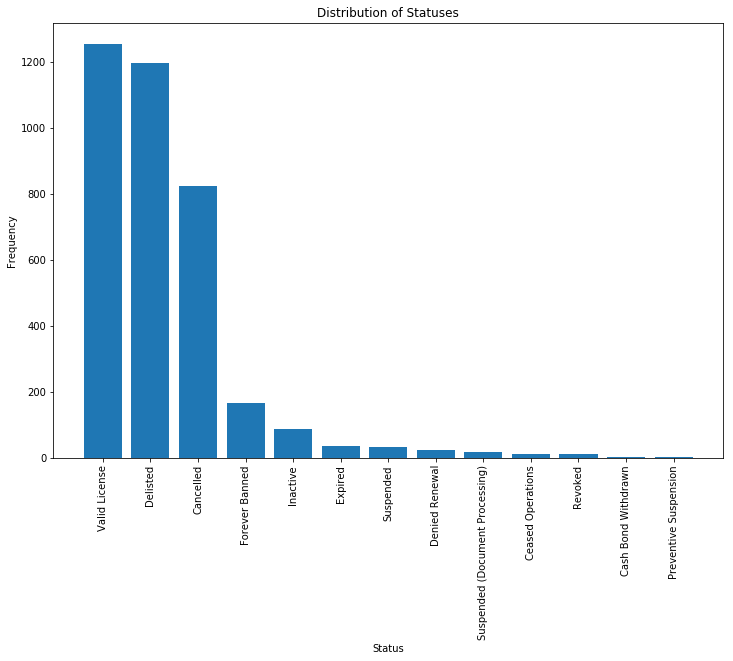

In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lists = [(k, status_list[k]) for k in sorted(dict(status_list), key = dict(status_list).get, reverse = True)]

category, height = zip(*lists)
x_position = np.arange(len(status_list)

fig, ax = plt.subplots(figsize = (12,8))
plt.title('Distribution of Statuses')
plt.ylabel('Frequency')
plt.xlabel('Status')

# Create bars
plt.bar(x_position, height)
 
# Create names on the x-axis
plt.xticks(x_position, category, rotation = 'vertical')
 
# Show graphic
plt.show()

In [ ]:
email_list = Counter(dataframe['Email Address'])
rep_list = Counter(dataframe['Official Representative'])
telnum_list = Counter(dataframe['Tel No/s'])
web_list = Counter(dataframe['Website'])

# Sort dictionaries by value in descending order, keep top ten items
top_email_list = dict(sorted(email_list.items(), key=lambda x:x[1], reverse=True)[:10])
top_rep_list = dict(sorted(rep_list.items(), key=lambda x:x[1], reverse=True)[:10])
top_telnum_list = dict(sorted(telnum_list.items(), key=lambda x:x[1], reverse=True)[:10])
top_web_list = dict(sorted(web_list.items(), key=lambda x:x[1], reverse=True)[:10])


# Count amount of invalid emails/representative names/telephone numbers/websites
email_sum = 0
rep_sum = 0
telnum_sum = 0
web_sum = 0

for val in top_email_list:
    if '@' not in val:
        email_sum += top_email_list[val]
        
for val in top_rep_list:
    if val == '' or val == 'NA' or val == 'N/A' or val == 'None':
        rep_sum += top_rep_list[val]

for val in top_telnum_list:
    if val == '' or val == 'NA' or val == 'N/A' or val == 'None':
        telnum_sum += top_telnum_list[val]

for val in top_web_list:
    if val == '' or val == 'NA' or val == 'N/A' or val == 'None' or val == 'NONE' or val == 'http':
        web_sum += top_web_list[val]


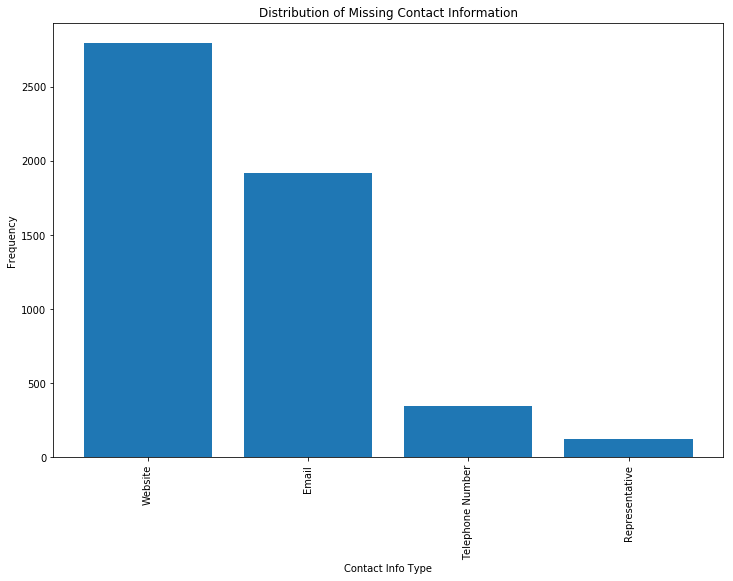

In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sums = {'email_sum': email_sum, 'rep_sum': rep_sum, 'telnum_sum': telnum_sum, 'web_sum': web_sum}

lists = [(k, sums[k]) for k in sorted(sums, key = sums.get, reverse = True)]

category, height = zip(*lists)
x_position = np.arange(len(sums))

fig, ax = plt.subplots(figsize = (12,8))
plt.title('Distribution of Missing Contact Information')
plt.ylabel('Frequency')
plt.xlabel('Contact Info Type')

# Create bars
plt.bar(x_position, height)
 
# Create names on the x-axis
plt.xticks(x_position, ['Website', 'Email', 'Telephone Number', 'Representative'], rotation = 'vertical')
 
# Show graphic
plt.show()

In [7]:
address_sum = dict(Counter(dataframe['Address']))
sorted_address_sum = [(k, address_sum[k]) for k in sorted(address_sum, key = address_sum.get, reverse = True)]
address_df = pd.DataFrame(data = sorted_address_sum, columns = ['Address', 'Frequency'])
address_df

,Address,Frequency
0,NO ADDRESS,4
1,"RCM BLDG 1418 SAN MARCELINO ST ERMITA, MANILA",3
2,"RM 202 2F KIMVI BLDG 1191 MA OROSA ST ERMITA, ...",2
3,ST.JUDE BLDG 1020 MALVAR ST COR MODESTO MALATE...,2
4,ARL BLDG GLORIA 111 CASANOVA DRIVE T.SORA Q.C.,2
5,"SUITE 18-A,18F RAMON MAGSAYSAY CENTER 1680 ROX...",2
6,#16 JUPITER COR ANTARES ST BEL-AIR VILLAGE MAKATI,2
7,S501 5F 1377 A MABINI COR STA MONICA ST ERMITA...,2
8,FERROS BLDG 176 SALCEDO ST LEGASPI VILL MAKATI,2
9,GF 2F 5F 6F 8F 9F & 10F BSM HOUSE 1965 L GUINT...,2


In [35]:
dataframe.corr()

,Address Missing,Any Missing,Email Missing,Negative Status,Representative Missing,Telephone Missing,Website Missing
Address Missing,1.000000,0.031586,0.031586,-0.045781,0.182025,0.101890,0.018491
Any Missing,0.031586,1.000000,1.000000,0.678280,-0.006677,0.304417,0.573898
Email Missing,0.031586,1.000000,1.000000,0.678280,-0.006677,0.304417,0.573898
Negative Status,-0.045781,0.678280,0.678280,1.000000,0.046058,0.200874,0.510636
Representative Missing,0.182025,-0.006677,-0.006677,0.046058,1.000000,-0.011307,0.025106
Telephone Missing,0.101890,0.304417,0.304417,0.200874,-0.011307,1.000000,0.181484
Website Missing,0.018491,0.573898,0.573898,0.510636,0.025106,0.181484,1.000000
